# Khoa học dữ liệu - Dữ liệu người dùng Facebook

### Câu 1: Phương pháp Bootstrap

Import các thư viện

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

Đầu tiên, chúng ta sẽ đọc dữ liệu đầu vào và lựa chọn biến đặc trưng là tuổi

In [104]:
# Read dataset
data = pd.read_csv('pseudo_facebook.csv')

# Choose age column from dataset
data_age_column = data.age

Tiếp theo là phần cài đặt phương pháp Bootstrap, dữ liệu trả về  là phân bố lấy mẫu bằng Histogram và dải tin cậy của giá trị trung bình của tuổi

In [148]:
# n is sample size
# M is number of bootstrap samplings
# x is confidence interval in %
def bootstrap(n, M, x):
    mean = []
    sample = []

    for i in range(M):
        random_sample = random.sample(data_age_column.tolist(), n)
        mean.append(np.mean(random_sample))
        sample.append(random_sample)
        
    # Confidence interval
    # x = 100 * (1 - 2 * alpha)
    alpha = (100 - x) / 200
    mean.sort()
    lower_bound = mean[int(M * alpha)]
    upper_bound = mean[int(M * (1 - alpha))]
    
    plt.figure(figsize=(12, 8))
    fig = sns.histplot(mean, kde=True, bins=10, stat="probability")
    fig.set_xlabel('Age')
    plt.axvline(lower_bound, color='r')
    plt.axvline(upper_bound, color='r')
    plt.show()

Gọi hàm Bootstrap với tham số đầu vào theo thứ tự là (sample size, number of bootstrap samplings, confidence interval)

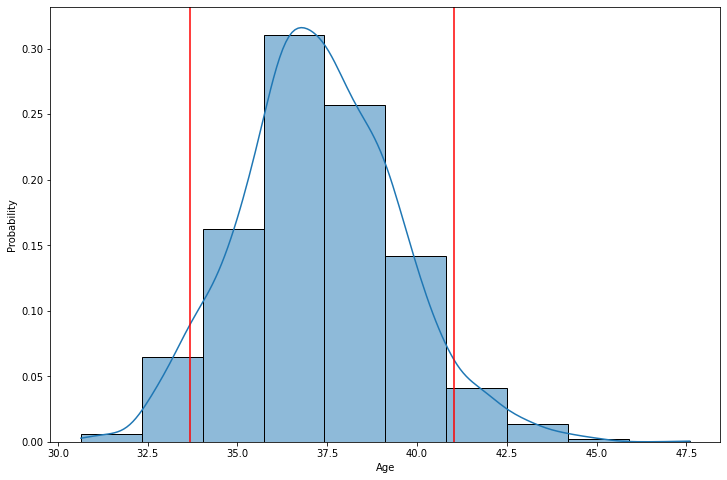

In [203]:
bootstrap(100, 3000, 90)

### Câu 2:

Dựa vào dữ liệu đầu ở câu 1, đầu tiên ta sẽ xét xem số tuổi thấp nhất và cao nhất của người dùng Facebook

In [107]:
print('Min age of a person on facebook: ', data['age'].min())
print('Max age of a person on facebook: ', data['age'].max())

Min age of a person on facebook:  13
Max age of a person on facebook:  113


Số tuổi thấp nhất và cao nhất của người dùng Facebook giao động từ 13 đến 113 tuổi nên ta sẽ tiến hành chia thành các nhóm tuổi. Ở đây ta chia thành 11 nhóm

In [217]:
# Add column "age_group" to dataset
age_group = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']
data['age_group'] = pd.cut(data_age_column, bins=np.arange(10, 121, 10), labels=age_group, right=True)

Tiếp theo, ta đếm xem người dùng Facebook nằm trong khoảng độ tuổi nào nhiều nhất

In [220]:
count_age_group = data['age_group'].value_counts().reset_index().rename(columns={'index':'age_group', 'age_group':'count'})
count_age_group

,age_group,count
0,21-30,28646
1,10-20,24752
2,31-40,12491
3,51-60,9319
4,41-50,8968
5,61-70,6855
6,101-110,3449
7,71-80,2249
8,91-100,1219
9,81-90,817


Ta tiến hành vẽ biểu đồ pointplot thể hiện tần suất các nhóm tuổi sử dụng Facebook

<AxesSubplot:xlabel='age_group', ylabel='count'>

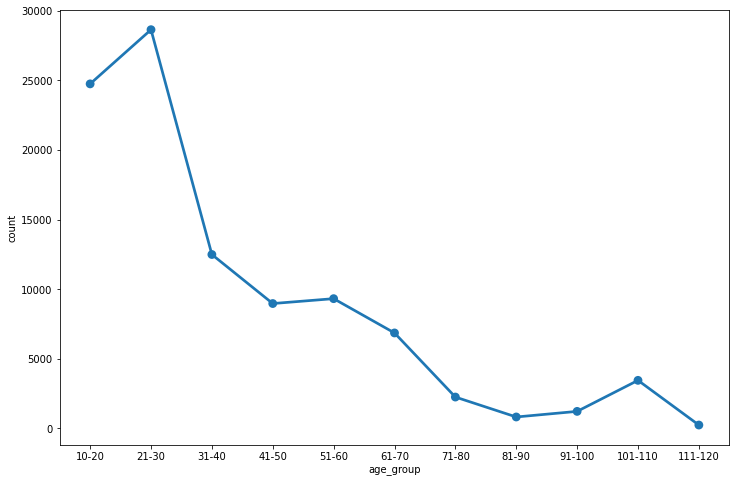

In [145]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='age_group', y='count', data=count_age_group)

Từ biểu đồ trên, ta thấy nhóm tuổi từ 21 đến 30 sử dụng facebook nhiều nhất.

In [111]:
count_gender = data['gender'].value_counts().reset_index().rename(columns={'gender':'count','index':'gender'})
count_gender

,gender,count
0,male,58574
1,female,40254


<AxesSubplot:xlabel='gender', ylabel='count'>

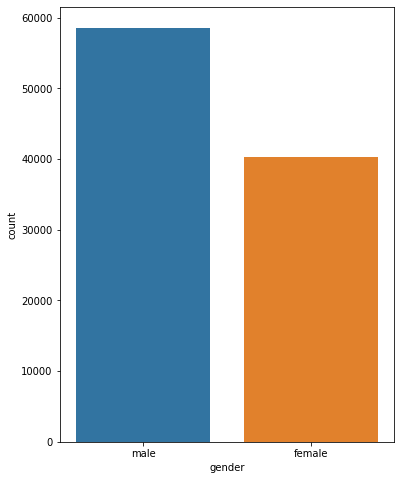

In [192]:
plt.figure(figsize=(6, 8))
sns.countplot(x='gender', data=data)

<AxesSubplot:xlabel='age_group', ylabel='likes_received'>

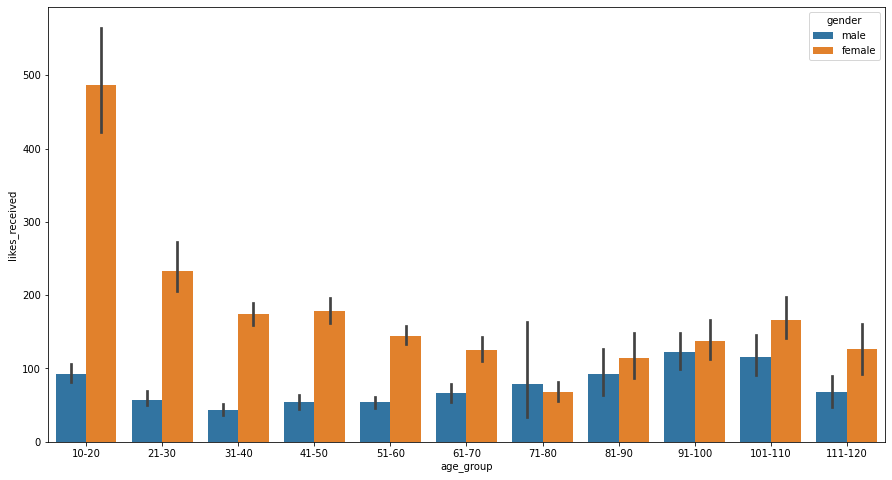

In [99]:
plt.figure(figsize=(15, 8))
sns.barplot(x='age_group', y='likes_received', data=data, hue='gender')

<AxesSubplot:xlabel='age_group', ylabel='likes'>

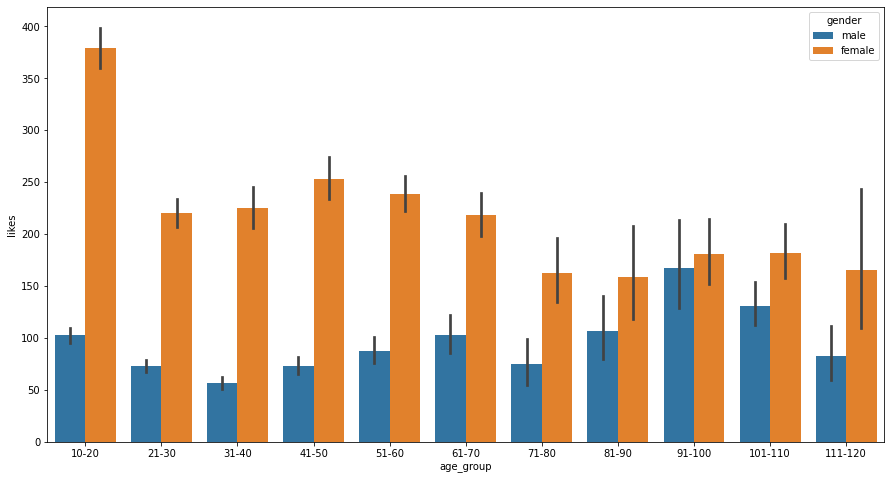

In [101]:
plt.figure(figsize=(15, 8))
sns.barplot(x='age_group', y='likes', data=data, hue='gender')

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

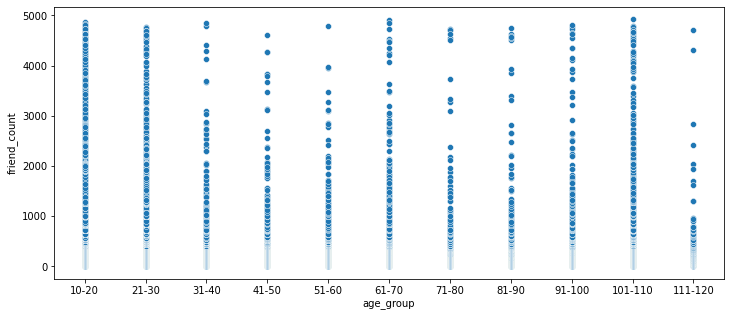

In [202]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='age_group', y='friend_count', data=data)

<AxesSubplot:xlabel='gender', ylabel='friend_count'>

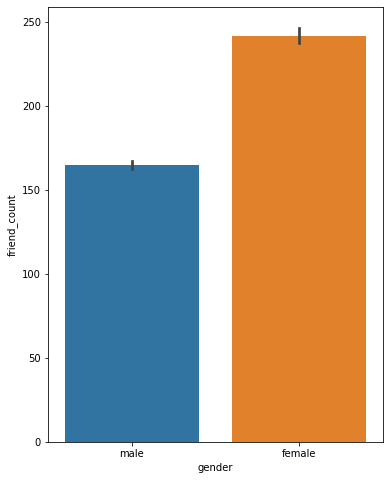

In [118]:
plt.figure(figsize=(6, 8))
sns.barplot(x='gender', y='friend_count', data=data)

In [180]:
print('Min tenure on facebook: ', data['tenure'].min(), 'day')
print('Max tenure on facebook: ', data['tenure'].max(), 'days')

Min tenure on facebook:  0.0 day
Max tenure on facebook:  3139.0 days


In [152]:
# Add column "tenure_group" to dataset
tenure_group = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6-7 years', '7-8 years', '8-9 years']
data['tenure_group'] = pd.cut(data['tenure'], bins=np.arange(0, 365 * 9 + 1, 365), labels=tenure_group, right=True)

In [178]:
count_tenure_group = data['tenure_group'].value_counts().reset_index().rename(columns={'index':'tenure_group', 'tenure_group':'count'})
count_tenure_group

,tenure_group,count
0,0-1 year,43588
1,1-2 years,33366
2,2-3 years,9860
3,3-4 years,5448
4,4-5 years,4557
5,5-6 years,1507
6,6-7 years,581
7,7-8 years,15
8,8-9 years,9


<AxesSubplot:xlabel='tenure_group', ylabel='count'>

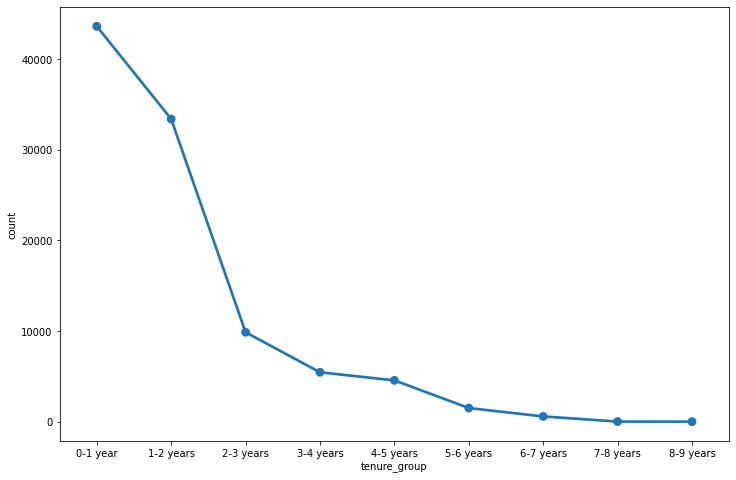

In [161]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='tenure_group', y='count', data=count_tenure_group)

<AxesSubplot:xlabel='age_group', ylabel='activity_per_day'>

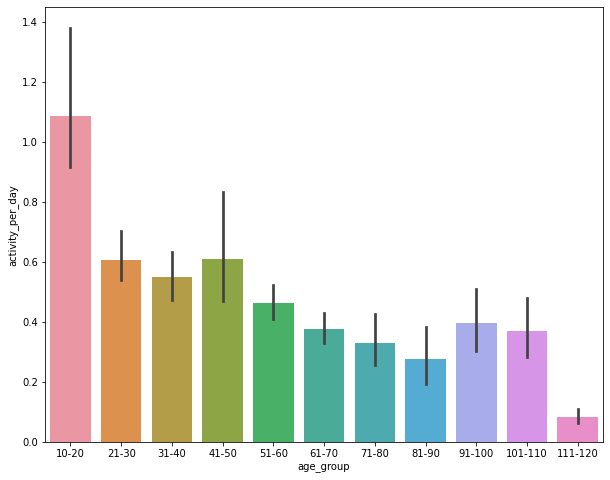

In [197]:
#  Age group and activity per day
data['activity_per_day'] = (data['likes'] / data['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.figure(figsize=(10, 8))
sns.barplot(data=data, x='age_group', y='activity_per_day')

<AxesSubplot:xlabel='gender', ylabel='activity_per_day'>

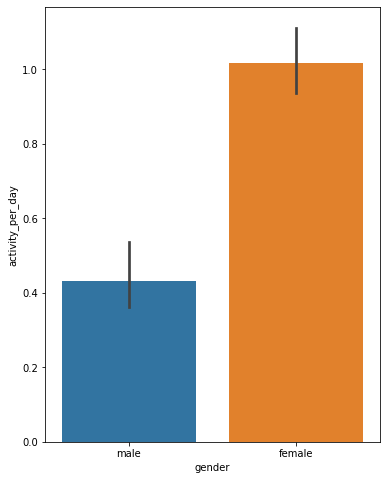

In [198]:
# Gender and activity per day
plt.figure(figsize=(6, 8))
sns.barplot(data=data, x='gender', y='activity_per_day')